In [64]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
import warnings
warnings.filterwarnings("ignore")

In [65]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: ylabel='sex'>

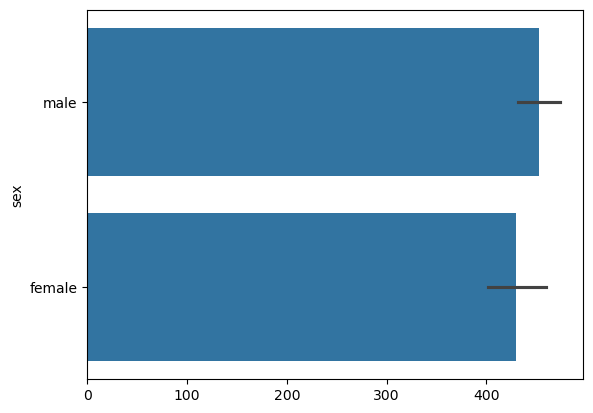

In [66]:
sns.barplot(df["sex"])

<Axes: ylabel='fare'>

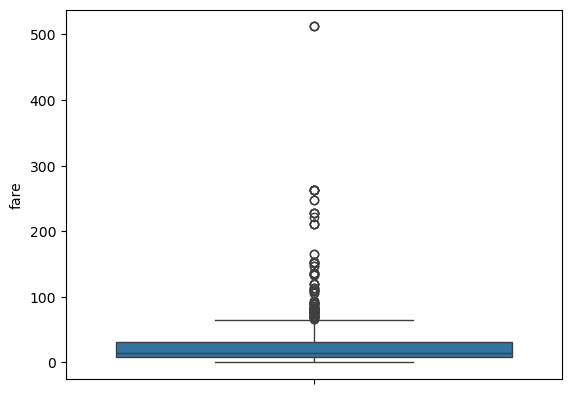

In [67]:
sns.boxplot(df["fare"])

In [68]:
df["fare"].loc[df["fare"]<7.9104]=df["fare"].describe()[4]

In [69]:
df["fare"].loc[df["fare"]> 31.0]=df["fare"].describe()[6]

<Axes: ylabel='fare'>

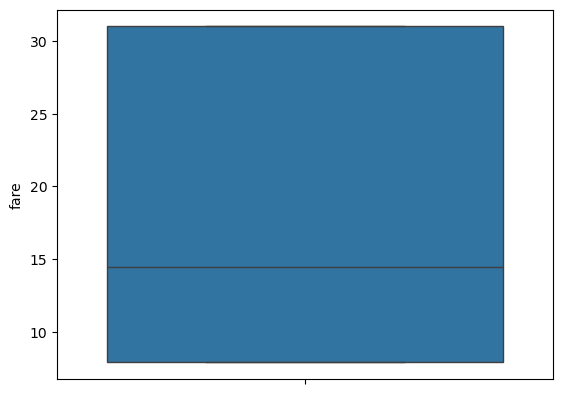

In [70]:
sns.boxplot(df["fare"])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [72]:
df["age"]=df["age"].fillna(df["age"].mean())

In [73]:
df["embarked"]=df["embarked"].fillna("Q")

In [74]:
df.drop(["deck"],axis=1,inplace=True)

In [75]:
df["embark_town"]=df["embark_town"].fillna("Cherbourg")

In [76]:
df.isnull().sum().sum()

0

In [77]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.9104,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,31.0000,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,31.0000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
encoer=LabelEncoder()

In [80]:
df["sex"]=encoer.fit_transform(df["sex"])

In [81]:
df["embarked"]=LabelEncoder().fit_transform(df["embarked"])

In [82]:
df["class"]=LabelEncoder().fit_transform(df["class"])

In [83]:
df.drop(["who"],axis=1,inplace=True)

In [84]:
df["adult_male"]=LabelEncoder().fit_transform(df["adult_male"])

In [85]:
import numpy as np
np.unique(df["class"])

array([0, 1, 2])

In [86]:
df["embark_town"]=LabelEncoder().fit_transform(df["embark_town"])

In [87]:
np.unique(df["embark_town"])

array([0, 1, 2])

In [88]:
df.drop(["alive"],axis=1,inplace=True)

In [89]:
df["alone"]=LabelEncoder().fit_transform(df["alone"])

In [90]:
df.drop(["adult_male"],axis=1,inplace=True)

In [91]:
df.drop(["embarked"],axis=1,inplace=True)

In [92]:
df["age"]=df["age"].astype(int)

In [93]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,1,22,1,0,7.9104,2,2,0
1,1,1,0,38,1,0,31.0000,0,0,0
2,1,3,0,26,0,0,7.9250,2,2,1
3,1,1,0,35,1,0,31.0000,0,2,0
4,0,3,1,35,0,0,8.0500,2,2,1
5,0,3,1,29,0,0,8.4583,2,1,1
6,0,1,1,54,0,0,31.0000,0,2,1
7,0,3,1,2,3,1,21.0750,2,2,0
8,1,3,0,27,0,2,11.1333,2,2,0
9,1,2,0,14,1,0,30.0708,1,0,0


In [94]:
df_dummies = pd.get_dummies(df, columns=['pclass'], prefix='pclass',drop_first=True).astype(int)
df_dummies = pd.get_dummies(df_dummies, columns=['class'], prefix='class',drop_first=True).astype(int)
df_dummies = pd.get_dummies(df_dummies, columns=['embark_town'], prefix='embark_town',drop_first=True).astype(int)

In [95]:
df_dummies

,survived,sex,age,sibsp,parch,fare,alone,pclass_2,pclass_3,class_1,class_2,embark_town_1,embark_town_2
0,0,1,22,1,0,7,0,0,1,0,1,0,1
1,1,0,38,1,0,31,0,0,0,0,0,0,0
2,1,0,26,0,0,7,1,0,1,0,1,0,1
3,1,0,35,1,0,31,0,0,0,0,0,0,1
4,0,1,35,0,0,8,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27,0,0,13,1,1,0,1,0,0,1
887,1,0,19,0,0,30,1,0,0,0,0,0,1
888,0,0,29,1,2,23,0,0,1,0,1,0,1
889,1,1,26,0,0,30,1,0,0,0,0,0,0


In [97]:
x=df.drop(["survived"],axis=1)
y=df["survived"]

In [98]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [99]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [100]:
rf_model=RandomForestClassifier().fit(x_train,y_train)

In [102]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,rf_model.predict(x_test))

0.7835820895522388

In [103]:
grad_model=GradientBoostingClassifier().fit(x_train,y_train)

accuracy_score(y_test,grad_model.predict(x_test))

0.8097014925373134

In [105]:
ada_model=AdaBoostClassifier().fit(x_train,y_train)
accuracy_score(y_test,ada_model.predict(x_test))

0.8134328358208955

In [106]:
from sklearn.tree import DecisionTreeClassifier
tre_modell=DecisionTreeClassifier().fit(x_train,y_train)

accuracy_score(y_test,tre_modell.predict(x_test))

0.7611940298507462

In [107]:
from sklearn.naive_bayes import CategoricalNB

nb_model=CategoricalNB().fit(x_train,y_train)

In [108]:
accuracy_score(y_test,nb_model.predict(x_test))

0.746268656716418

In [109]:
from catboost import CatBoostClassifier

cat_model=CatBoostClassifier().fit(x_train,y_train)
accuracy_score(y_test,cat_model.predict(x_test))

Learning rate set to 0.008417
0:	learn: 0.6874751	total: 150ms	remaining: 2m 29s
1:	learn: 0.6824592	total: 152ms	remaining: 1m 15s
2:	learn: 0.6776853	total: 153ms	remaining: 50.8s
3:	learn: 0.6728405	total: 154ms	remaining: 38.4s
4:	learn: 0.6667888	total: 156ms	remaining: 31s
5:	learn: 0.6623081	total: 157ms	remaining: 26s
6:	learn: 0.6565440	total: 158ms	remaining: 22.4s
7:	learn: 0.6518552	total: 159ms	remaining: 19.8s
8:	learn: 0.6469997	total: 161ms	remaining: 17.7s
9:	learn: 0.6443549	total: 162ms	remaining: 16s
10:	learn: 0.6399923	total: 164ms	remaining: 14.7s
11:	learn: 0.6357847	total: 166ms	remaining: 13.6s
12:	learn: 0.6313264	total: 168ms	remaining: 12.8s
13:	learn: 0.6268417	total: 170ms	remaining: 12s
14:	learn: 0.6240717	total: 171ms	remaining: 11.2s
15:	learn: 0.6201957	total: 173ms	remaining: 10.6s
16:	learn: 0.6166022	total: 174ms	remaining: 10s
17:	learn: 0.6124357	total: 175ms	remaining: 9.53s
18:	learn: 0.6081866	total: 176ms	remaining: 9.09s
19:	learn: 0.606041

0.8059701492537313

#### Keras

In [110]:
from keras.layers import Dense,Dropout

In [112]:
from keras.models import Sequential

In [115]:
x_train.shape

(623, 9)

In [133]:
model=Sequential()

model.add(Dense(128,activation="tanh",input_shape=(9,)))

model.add(Dense(64,activation="relu"))

model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [134]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=50)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4345 - loss: 0.8558 - val_accuracy: 0.6045 - val_loss: 0.6634
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6315 - loss: 0.6550 - val_accuracy: 0.6119 - val_loss: 0.6302
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6654 - loss: 0.6123 - val_accuracy: 0.6791 - val_loss: 0.6051
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6684 - loss: 0.6219 - val_accuracy: 0.7201 - val_loss: 0.5940
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6647 - loss: 0.6095 - val_accuracy: 0.6978 - val_loss: 0.5909
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6416 - loss: 0.6146 - val_accuracy: 0.7015 - val_loss: 0.5912
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6778 - loss: 0.6069 - val_accuracy: 0.7388 - val_loss: 0.5847
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6946 - loss: 0.6056 - val_accuracy: 0.7052 - val_loss: 0.5871


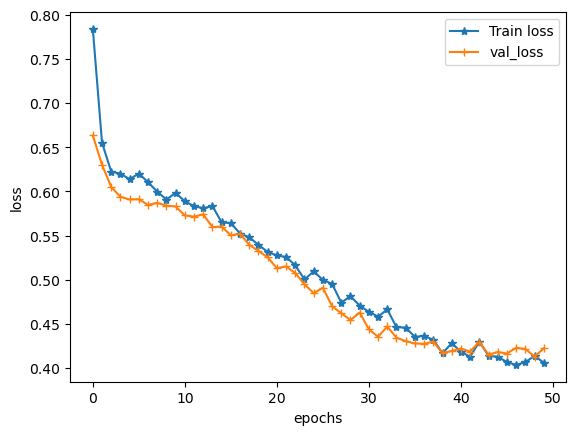

In [135]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model.history.history["loss"],marker="*",label="Train loss")
plt.plot(model.history.history["val_loss"],marker="+",label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

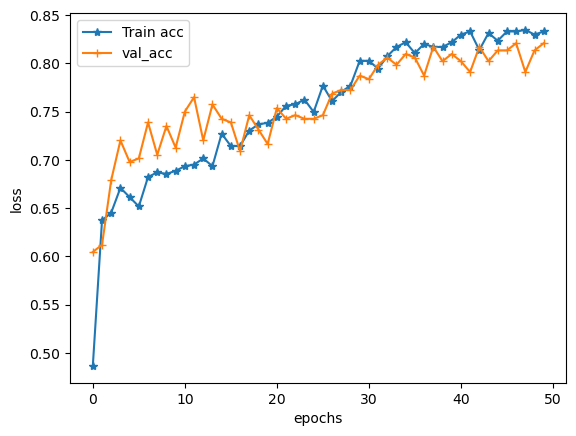

In [136]:

plt.figure()
plt.plot(model.history.history["accuracy"],marker="*",label="Train acc")
plt.plot(model.history.history["val_accuracy"],marker="+",label="val_acc")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()